In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go

- Jag kommer jämföra andelen infekterade av covid-19 i varje kontinent.
- Vad jag misstänker är följande order (lägst till störst andel): Oceania -> Europa -> Asia -> America -> Africa
- Jag tänker mig att Oceania kommer först eftersom dem är väldigt utspridda, många öar, samt har många i-länder i sig.
- Jag tror att Europa kommer 2:a eftersom vi har många i-länder och generellt sett en vetenskaplig kultur. 
- Asien tänker jag mig kan komma trea, alltså före america eftersom länder som USA har en kultur av icke-vaccinerande och konspirationstänk i vissa grupper. Jag har svårt att gissa på hur resten av America kommer påverka den slutliga andelen. Asien har även länder som Kina, vilket gör det svårt att lita exakt på att deras siffror av infekterade stämmer helt.
- Jag gissar på att Afrika kommer sist endast för att dem har såpass många u-länder vilket gör det svårt att sätta stopp för mycket infektioner. Dock kan jag ha helt fel här eftersom Afrika är hem till många stammar som tex lever isolerat från resten av populationen.

In [16]:
worldcoviddata = pd.read_csv("../Data/worldwidedata_covid.csv")

def continent_total(variable_name, continent_name):
    variable_name = worldcoviddata[(worldcoviddata["country"] == continent_name)].sort_values(by='cumulative_count', ascending=False).head()
    print(variable_name['cumulative_count'].head(1))

In [17]:
worldcoviddata[worldcoviddata['rate_14_day']]

KeyError: "None of [Float64Index([               nan,                0.0,                0.0,\n                             0.0,                0.0,                0.0,\n                             0.0,                0.0, 0.0025688225449936,\n              0.0102752901799745,\n              ...\n                54.6870727572441,   46.8746337919235,   36.8300694079399,\n                 45.758571082592,    50.222821919918,   44.6425083732605,\n                32.3658185706138,                nan,                nan,\n                5.58031354665756],\n             dtype='float64', length=53074)] are in the [columns]"

In [32]:
s_countries = worldcoviddata[worldcoviddata["country"].apply(lambda state: state[0] == "S")]
s_countries.reset_index(drop='index')

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
40388,Saint Kitts And Nevis,KNA,America,53192,cases,7.0,2020-13,NaN,7.0,Epidemic intelligence national data,NaN
40389,Saint Kitts And Nevis,KNA,America,53192,cases,3.0,2020-14,18.799820,10.0,Epidemic intelligence national data,NaN
40390,Saint Kitts And Nevis,KNA,America,53192,cases,2.0,2020-15,9.399910,12.0,Epidemic intelligence national data,NaN
40391,Saint Kitts And Nevis,KNA,America,53192,cases,3.0,2020-16,9.399910,15.0,Epidemic intelligence national data,NaN
40392,Saint Kitts And Nevis,KNA,America,53192,cases,0.0,2020-17,5.639946,15.0,Epidemic intelligence national data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
46719,Syria,SYR,Asia,17500657,deaths,0.0,2022-19,0.000000,3150.0,Epidemic intelligence national data,NaN
46720,Syria,SYR,Asia,17500657,deaths,0.0,2022-20,0.000000,3150.0,Epidemic intelligence national data,NaN
46721,Syria,SYR,Asia,17500657,deaths,0.0,2022-21,0.000000,3150.0,Epidemic intelligence national data,NaN
46722,Syria,SYR,Asia,17500657,deaths,0.0,2022-22,0.000000,3150.0,Epidemic intelligence national data,NaN


In [ ]:
for x in s_countries:
    sns.lineplot(data=s_countries, x="rate_14_day", y="year_week")

In [ ]:
continent_total(worldcoviddata, "Europe (total)")

16595    216693251.0
Name: cumulative_count, dtype: float64


- Europa totalt: 216,693,251 antal fall
- Europa total befolkning: 747,636,000 (2020)
- Europa andel infekterade: 28.98%

In [ ]:
continent_total(worldcoviddata, "Africa (total)")

380    11937718.0
Name: cumulative_count, dtype: float64


- Afrika totalt: 11,937,718 antal fall
- Afrika total befolkning: 1,340,000,000 (2020)
- Afrika andel infekterade: 0.89% infekterade

In [ ]:
continent_total(worldcoviddata, "Oceania (total)")

36504    9196406.0
Name: cumulative_count, dtype: float64


- Oceania totalt: 9,196,406 antal fall
- Oceania total befolkning: 42,677,000 (2020)
- Oceania andel infekterade: 21.54% infekterade

In [ ]:
continent_total(worldcoviddata, "America (total)")

1124    160090765.0
Name: cumulative_count, dtype: float64


- America totalt: 160,090,765 antal fall
- America total befolkning: 1,002,000,000 (2020)
- America andel infekterade: 15.97% infekterade

In [ ]:
continent_total(worldcoviddata, "Asia (total)")

3102    135192948.0
Name: cumulative_count, dtype: float64


- Asien totalt: 135,192,948 antal fall
- Asien total befolkning: 4,641,000,000 (2020)
- Asien andel infekterade: 2.91% infekterade
----------------------------------
- Slutgiltiga ordningen (Lägst till högst)
- Africa --> Asien --> America --> Oceania --> Europa
- Det var allså i stort sett tvärt emot vad jag tänkte mig att det skulle vara, dock verkar det otroligt suspekt att inte ens 1% av Afrika har infekterats medans nästan 30% infekterats i Europa. Det hade inte förvånat mig om det rapporterades sämre i dem kontinenterna som hade såpass låg andel.
- Jag tänkte mig först när jag såg det här resultatet att det kanske har något med befolkningstätheten i varje kontinent, alltså att Europa har hög befolkningstäthet(69.7 pers per km^2). Det stämmer också, dock så har Asien ännu högre (86,7 pers per km^2). Det kan alltså inte vara den enda viktiga variabeln i spel till varför Europa har högst andel.
- Jag kan dock säga att efter att ha kollat upp andelen i varje kontinent så är det absolut inte tillräckligt för att dra några slutsatser kring varför andelen ser ut som dem gör.

In [ ]:
def country_total(variable_name, country_name):
    variable_name = worldcoviddata[(worldcoviddata["country"] == country_name)]
    return variable_name


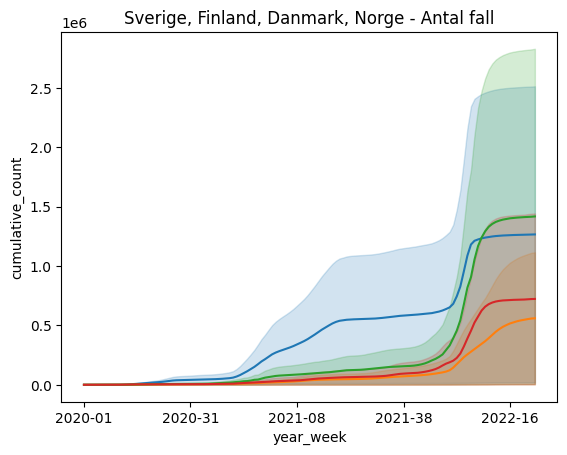

In [ ]:
# comparing Sweden, Finland, Denmark and Norway
sweden_data = worldcoviddata[(worldcoviddata["country"] == "Sweden")]
finland_data = worldcoviddata[(worldcoviddata["country"] == "Finland")]
denmark_data = worldcoviddata[(worldcoviddata["country"] == "Denmark")]
norway_data = worldcoviddata[(worldcoviddata["country"] == "Norway")]

sweden_data = sweden_data[['year_week', 'cumulative_count']]
finland_data = finland_data[['year_week', 'cumulative_count']]
denmark_data = denmark_data[['year_week', 'cumulative_count']]
norway_data = norway_data[['year_week', 'cumulative_count']]

ax = plt.axes()
sns.lineplot(data= sweden_data, x='year_week', y='cumulative_count')
sns.lineplot(data =finland_data, x = 'year_week', y = 'cumulative_count')
sns.lineplot(data =denmark_data, x = 'year_week', y = 'cumulative_count')
sns.lineplot(data =norway_data, x = 'year_week', y = 'cumulative_count')
ax.set(title = "Sverige, Finland, Danmark, Norge - Antal fall")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [ ]:
worldcoviddata['country'].unique()

array(['Afghanistan', 'Africa (total)', 'Albania', 'Algeria',
       'America (total)', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia (total)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Cote Divoire',
       'Croatia', 'Cuba', 'Curaçao', 'Czechia',
       'Democratic Republic Of The Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salva